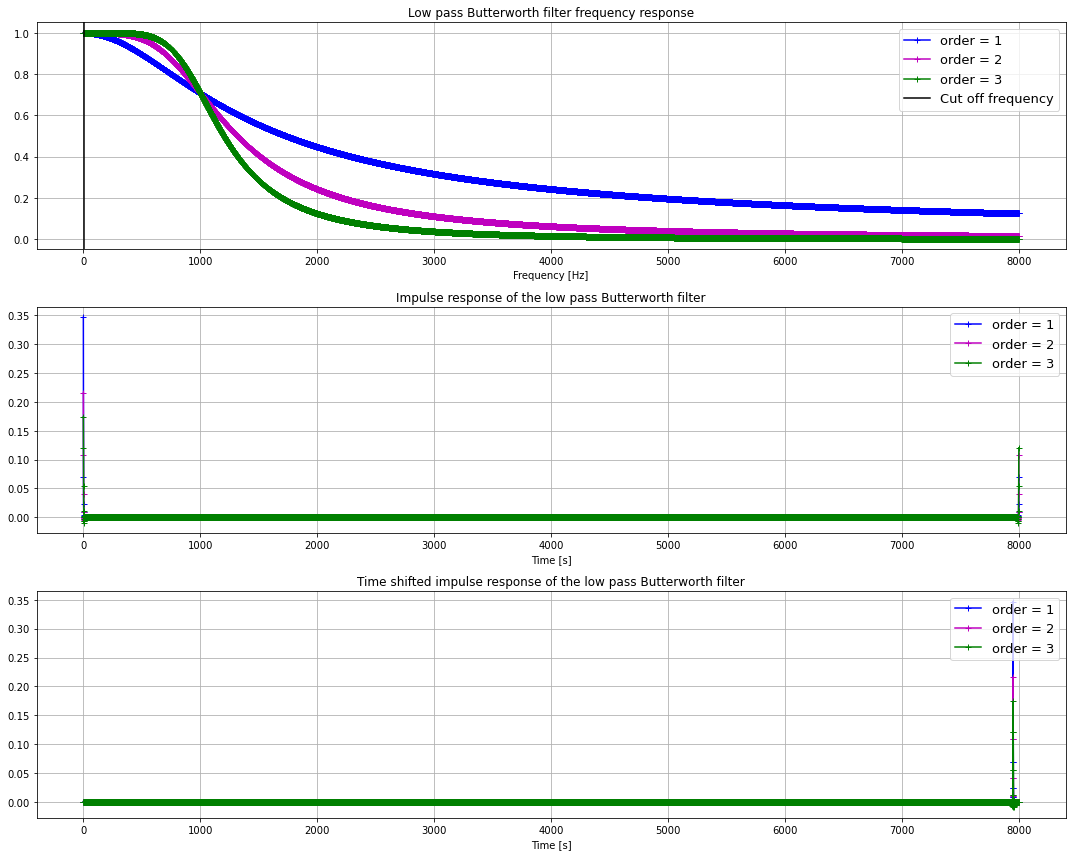

In [9]:
## Import the necessary packages
import numpy as np
import seaborn as sns
from scipy import signal
from scipy.signal import hilbert, remez, minimum_phase
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, irfft, ifft, ifftshift

import warnings
warnings.filterwarnings('ignore')

class Filter(object):
 """
     A class to represent a filter object, zero phase filtering, and minimum phase filtering.
     ...
     
     Parameters
     -----------
     w_c : int 
         Cut-off frequency (Hz)


     Attributes
     ----------
     t : list
         time vector (assumed sampling rate 1 sec)


   """

 def __init__(self, N, cutoff_freq, central_freq):
     """
     Constructs all the necessary attributes for the filter object.
     """

     self.N = N
     self.w_c  = cutoff_freq
     self.w_b  = central_freq
     self.w = np.array([i for i in range (self.N)])

 # Zero phase filtering
 def zero_phase_Butterworth (self, filter_type, filter_order):

   if filter_type == 'low_pass':
     return 1/((1+ (self.w/self.w_c)**(2*filter_order))**0.5)
   else:
     return 1/((1+ ((self.w - self.w_b)/self.w_c)**(2*filter_order))**0.5)

 # Minimum phase filtering
 def minimum_phase_filter(self, filter_type, filter_order): 

   power = np.square(np.abs(self.zero_phase_Butterworth (filter_type, filter_order)))
   #power = np.abs(self.zero_phase_Butterworth (filter_type, filter_order))
   return np.exp(signal.hilbert(np.real(np.log(power))))


cutoff_freq = 1000
central_freq = 2500
N = 8000

filter_order = [1,2,3]

# Design butterworth filters 
filter = Filter (N, cutoff_freq, central_freq)

##Zero Phase

# low pass filters
low_pass_butter1 = filter.zero_phase_Butterworth('low_pass', filter_order[0])       # first order low pass filter
low_pass_butter2 = filter.zero_phase_Butterworth('low_pass', filter_order[1])       # second order low pass filter
low_pass_butter3 = filter.zero_phase_Butterworth('low_pass', filter_order[2])       # third order low pass filter
# band pass filters
band_pass_butter1 = filter.zero_phase_Butterworth('band_pass', filter_order[0])     # first order band pass filter
band_pass_butter2 = filter.zero_phase_Butterworth('band_pass', filter_order[1])     # second order band pass filter
band_pass_butter3 = filter.zero_phase_Butterworth('band_pass', filter_order[2])     # third order band pass filter

##Minimum Phase

# low pass filters
lp_minphasefilter_signal1 = filter.minimum_phase_filter('low_pass', filter_order[0])       # first order low pass filter
lp_minphasefilter_signal2 = filter.minimum_phase_filter('low_pass', filter_order[1])       # second order low pass filter
lp_minphasefilter_signal3 = filter.minimum_phase_filter('low_pass', filter_order[2])       # third order low pass filter
# band pass filters
bp_minphasefilter_signal1 = filter.minimum_phase_filter('band_pass', filter_order[0])     # first order band pass filter
bp_minphasefilter_signal2 = filter.minimum_phase_filter('band_pass', filter_order[1])     # second order band pass filter
bp_minphasefilter_signal3 = filter.minimum_phase_filter('band_pass', filter_order[2])     # third order band pass filter


fig = plt.figure(figsize=(15, 12))       # Open a graphical window

# Plot 1: Plot the filter frequency response
plt.subplot(3,1,1)
plt.plot(low_pass_butter1,'b+-', label="order = 1")                       
plt.plot(low_pass_butter2,'m+-', label="order = 2")                        
plt.plot(low_pass_butter3,'g+-', label="order = 3")                       
plt.axvline(x=8, color = 'k', label="Cut off frequency")                   
plt.xlabel('Frequency [Hz]')                                              
plt.title('Low pass Butterworth filter frequency response')                
plt.legend(loc="upper right", prop={"size":13})                           
plt.grid()

# Plot 2: Plot the filter impulse response.
plt.subplot(3,1,2)
plt.plot(ifft(low_pass_butter1) ,'b+-', label="order = 1")                  
plt.plot(ifft(low_pass_butter2) ,'m+-', label="order = 2")                       
plt.plot(ifft(low_pass_butter3) ,'g+-', label="order = 3")                        
plt.xlabel('Time [s]')                                                           
plt.title('Impulse response of the low pass Butterworth filter')                
plt.legend(loc="upper right", prop={"size":13})                                  
plt.grid()

# Plot 3: Plot the filter shifted impulse response.
plt.subplot(3,1,3)

plt.plot(np.concatenate((ifft(low_pass_butter1).squeeze()[50:], 
                        ifft(low_pass_butter1).squeeze()[:50]), 
                        axis=0),'b+-', label="order = 1")  
plt.plot(np.concatenate((ifft(low_pass_butter2).squeeze()[50:], 
                        ifft(low_pass_butter2).squeeze()[:50]), 
                        axis=0),'m+-', label="order = 2")   
plt.plot(np.concatenate((ifft(low_pass_butter3).squeeze()[50:], 
                        ifft(low_pass_butter3).squeeze()[:50]), 
                        axis=0),'g+-', label="order = 3")  

plt.xlabel('Time [s]')                                                                           
plt.title('Time shifted impulse response of the low pass Butterworth filter')                                       
plt.legend(loc="upper right", prop={"size":13})                                                        
plt.grid()

fig.tight_layout()
plt.show()
